# **EDA**

In [1]:
#importando las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
path = "C:/Users/franc/Documents/Lic. IA/Semestre 4/Machine learning" # Cambiar por la ruta de los datos
df = pd.read_csv(path + '/data/chess_games_clean.csv')

## Exploración de datos

In [3]:
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11,-11,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11,12,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13,-13,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27,-25,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14,13,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [4]:
#Explorando los diferentes valores de las columnas
for col in df.columns:
    print(df[col].value_counts())
    print("\n\n")

Event
Blitz                   2338376
Classical               1509075
Bullet                  1197656
Bullet tournament        546619
Blitz tournament         472072
Classical tournament     165507
Correspondence            22211
Name: count, dtype: int64



White
Beserking101     2872
decidement       2494
universe64       2492
behran64         2440
Nkko             2379
                 ... 
aanand1004          1
ilocan              1
Cat6ek              1
Antares-804         1
ipekkoprululu       1
Name: count, Length: 118502, dtype: int64



Black
Beserking101         2878
universe64           2514
decidement           2503
Nkko                 2347
behran64             2342
                     ... 
Blue1942                1
Eric_Gonneville79       1
spax10                  1
wwwalexwww              1
toyberk                 1
Name: count, Length: 115415, dtype: int64



Result
1-0        3111715
0-1        2901038
1/2-1/2     238763
Name: count, dtype: int64



UTCDate
2016.07.12

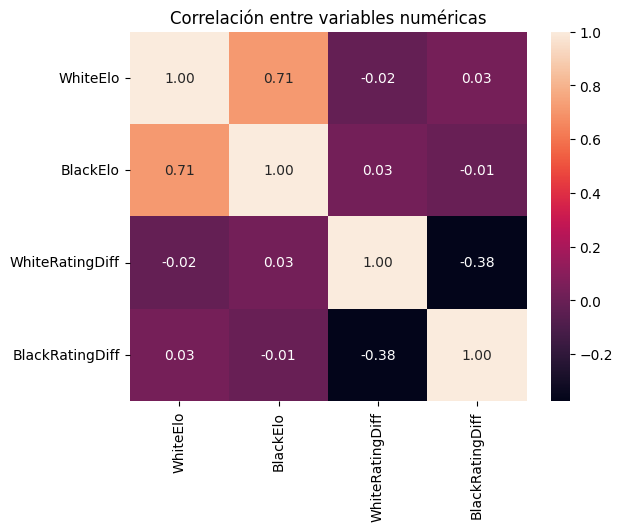

In [5]:
# Calculando la correlación sólo de las variables numéricas
df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

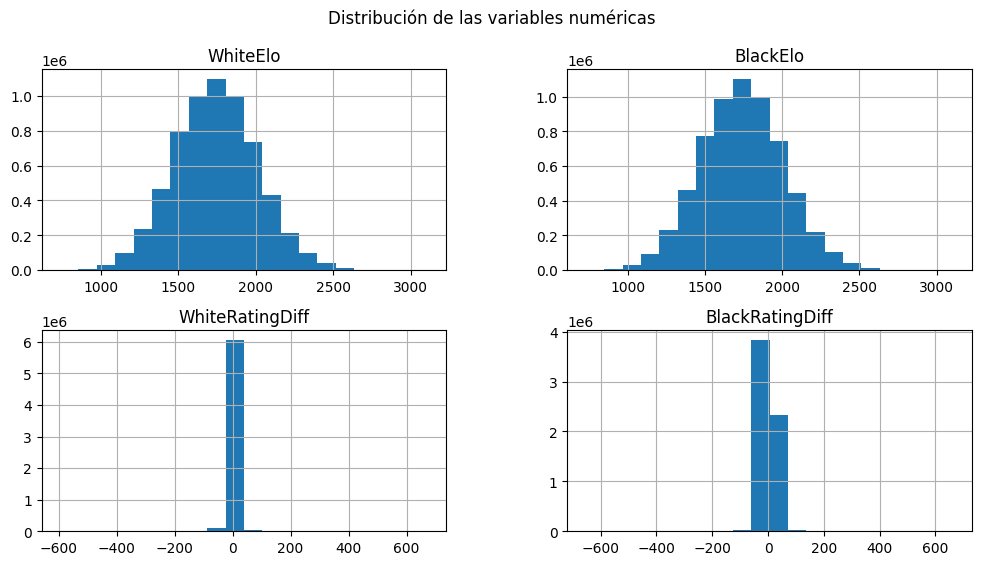

In [6]:
# Ver distribución de las variables 
df_num.hist(bins = 20, figsize = (12, 6))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

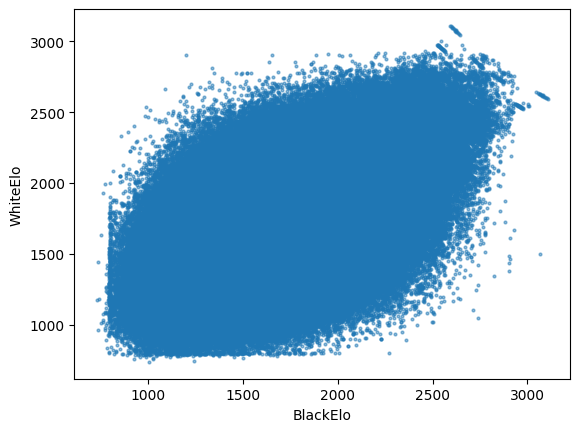

In [7]:
plt.plot(df["BlackElo"], df["WhiteElo"], 'o', markersize=2, alpha=0.5)
plt.xlabel('BlackElo')
plt.ylabel('WhiteElo')
plt.show()

In [10]:
for col in df.columns:
    print(col, df[col].nunique())

Event 7
White 118502
Black 115415
Result 3
UTCDate 32
UTCTime 86400
WhiteElo 2173
BlackElo 2181
WhiteRatingDiff 1177
BlackRatingDiff 1163
ECO 493
Opening 2941
TimeControl 841
Termination 4
AN 6184814


In [17]:
cols_cualitativas = []
for col in df.columns:
    if df[col].nunique() < 10:
        cols_cualitativas.append(col)

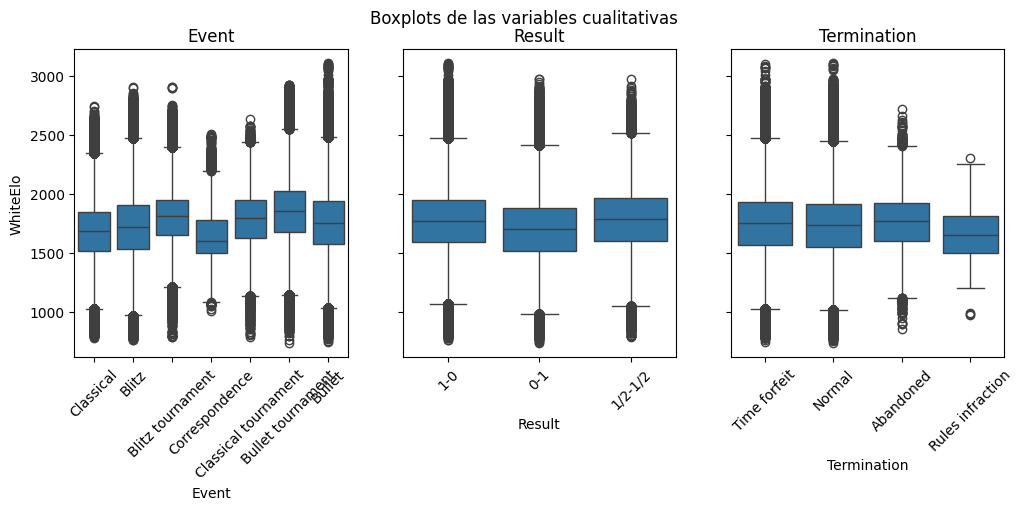

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
#graficar boxplots
for ax, col in zip(axs, cols_cualitativas):
    sns.boxplot(x=col, y='WhiteElo', data=df, ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(col)
    ax.set_ylabel('WhiteElo')
plt.suptitle('Boxplots de las variables cualitativas')
plt.show()

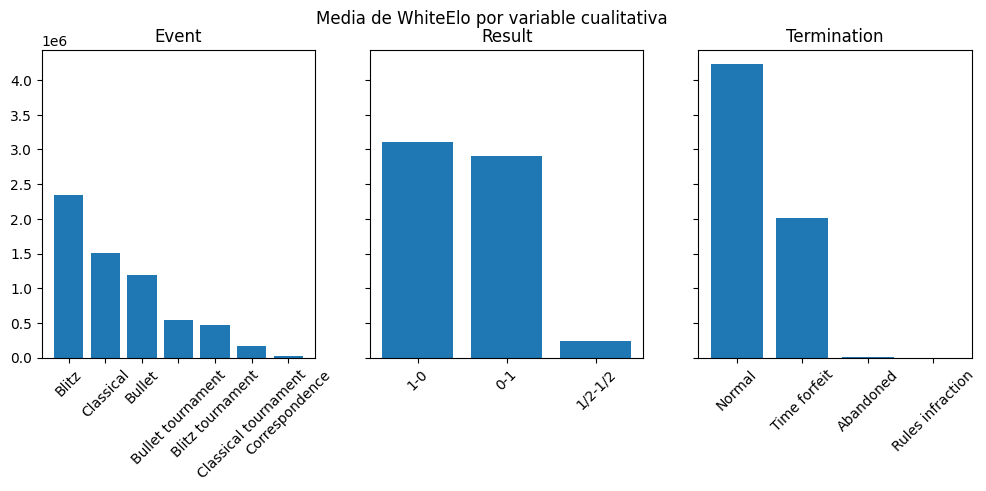

In [25]:
#graficas de barras
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for ax, col in zip(axs, cols_cualitativas):
    ax.bar(df[col].value_counts().index, df[col].value_counts().values)
    ax.set_title(col)
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.suptitle('Media de WhiteElo por variable cualitativa')
plt.show()